# 03-Fashion

![](https://images.unsplash.com/photo-1512436991641-6745cdb1723f?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

Photo by [Lauren Fleischmann](https://unsplash.com/photos/R2aodqJn3b8)

In this exercise, we will try to use a neural network on a simple classification task: classifying images of clothes into 10 classes.

We will first download the data:

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

This dataset contains 10 classes:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

Now begin by exploring the data. Try to display some images with the associated label.

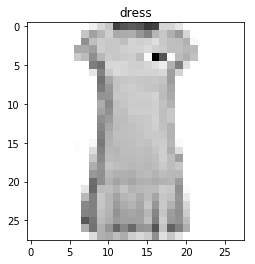

In [3]:
# TODO: Explore the data, display some input images
### STRIP_START ###
import matplotlib.pyplot as plt
import numpy as np

label_class = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

idx = np.random.randint(X_train.shape[0])

plt.imshow(X_train[idx], cmap='gray_r')
plt.title(label_class[y_train[idx]])
plt.show()
### STRIP_END ###

**Before going further**: what methods could you use to perform such a classification task?

---

The first method you will try is using neural networks. First step is the data preparation: data rescaling, label preparation.

Hint: you can use the Keras function `to_categorical`

In [4]:
# TODO: Make the data preparation
### STRIP_START ###
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

X_train_norm = X_train/255.
X_test_norm = X_test/255.

X_train_norm = X_train_norm.reshape(X_train_norm.shape[0], np.prod(X_train_norm.shape[1:]))
X_test_norm = X_test_norm.reshape(X_test_norm.shape[0], np.prod(X_test_norm.shape[1:]))
### STRIP_END ###

Next step: model building with Keras. Build your neural network architecture. At first, I would recommend a light architecture: no more than 2 hidden layers, with about 10 units per layer. Put that model into a function, so that you can reuse it later.

In [5]:
# TODO: Build your model
### STRIP_START ###
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def my_model(input_dim):
    # Create the Sequential object
    model = Sequential()

    # Add the first Dense layers of 100 units with the input dimension
    model.add(Dense(10, input_dim=input_dim, activation='sigmoid'))
    model.add(Dense(10, activation='sigmoid'))

    # Add the output layer with one unit: the predicted result
    model.add(Dense(10, activation='softmax'))
    
    return model
### STRIP_END ###

Now compile and fit your model on your training data. Since this is a multiclass classification, the loss is not `binary_crossentropy` anymore, but `categorical_crossentropy`.

In [7]:
# TODO: Compile and fit your model
model = my_model(input_dim=X_train_norm.shape[1])

### STRIP_START ###
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_norm, y_train_cat, epochs=10, batch_size=128)
### STRIP_END ###

Epoch 1/10
60000/60000 [==============================] - 1s 16us/sample - loss: 1.9257 - acc: 0.4622
Epoch 2/10
60000/60000 [==============================] - 1s 14us/sample - loss: 1.3031 - acc: 0.6976
Epoch 3/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.9640 - acc: 0.7469
Epoch 4/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.7761 - acc: 0.7682
Epoch 5/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.6681 - acc: 0.7944
Epoch 6/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.5918 - acc: 0.8204
Epoch 7/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.5379 - acc: 0.8318
Epoch 8/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.5023 - acc: 0.8385
Epoch 9/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.4774 - acc: 0.8422
Epoch 10/10
60000/60000 [==============================] - 1s 14us/sample - loss: 

Once your model has been trained, compute the accuracy (and other metrics if you want) on the train and test dataset.

Be careful, Keras returns softmax output (so an array of 10 values between 0 and 1, for which the sum is equal to 1). To compute correctly the accuracy, you have to convert that array into a categorical array with zeros and a 1.

In [10]:
# TODO: Compute the accuracy of your model
### STRIP_START ###
print('accuracy on train with NN:', model.evaluate(X_train_norm, y_train_cat)[1])
print('accuracy on test with NN:', model.evaluate(X_test_norm, y_test_cat)[1])
### STRIP_END ###

60000/60000 [==============================] - 1s 18us/sample - loss: 0.4479 - acc: 0.8488
accuracy on train with NN: 0.8488333
10000/10000 [==============================] - 0s 20us/sample - loss: 0.4905 - acc: 0.8325
accuracy on test with NN: 0.8325


What do you think of those results? Can you improve it by changing the number of layers? Of units per layer? The number of epochs? The activation functions?

You should try!

---

In order to compare your results with more traditional machine learning methods, you will do this work with another method: a PCA followed by a classification model (of your choice). Of course, you will perform hyperparameter optimization using a gridsearch on that model!

Fit your model and display the performances.

In [18]:
# TODO: Redo the classification with PCA and classification model
### STRIP_START ###
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)

pca.fit(X_train_norm)
X_train_pca = pca.transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)

### STRIP_END ###

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train_pca, y_train)

print('score with RF on train', rf.score(X_train_pca, y_train))
print('score with RF on train', rf.score(X_test_pca, y_test))

/home/vince/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


score with RF on train 0.9957
score with RF on train 0.8283


Did the neural network improve significantly the performances? Can you explain why?

If you still have time, you could try to use scikit-learn's `Pipeline` to perform the hyperparameter optimization jointly on the PCA and the classification model. This might improve your performances.